In [ ]:
import os
import webdataset as wds
path = "/share/j_sun/jth264/bites_frame_annotation" 
# dataset = "SR_070723_GH030275-000000..000099.tar"
# url = os.path.join(path, dataset)
tar_files = [os.path.join(path, tarfile) for tarfile in os.listdir(path)]

In [ ]:
from fish_benchmark.data.dataset import HeinFishBehavior
dataset = HeinFishBehavior(tar_files=tar_files)

In [ ]:
sample = next(iter(dataset))
sample[0]

In [ ]:
sample[0].size

In [ ]:
from transformers import AutoImageProcessor
AutoImageProcessor.from_pretrained('facebook/dinov2-base')

processor = AutoImageProcessor.from_pretrained('facebook/dinov2-base')
processed_image = processor(sample[0], return_tensors="pt")

In [ ]:
processed_image.pixel_values

In [ ]:
processed_image
from torchvision.transforms import ToPILImage
to_pil = ToPILImage()
img_pil = to_pil(processed_image['pixel_values'][0])

In [ ]:
img_pil

In [ ]:
sample[1]
categories = dataset.categories
for label in sample[1]:
    print(categories[label])

In [ ]:
for id, sample in enumerate(dataset):
    if id % 100 == 0:
        print(id)

In [ ]:
dataset = wds.DataPipeline(
        wds.SimpleShardList(tar_files),
        wds.decode("pil"),
        wds.to_tuple("png", "json")
    )
dataset = wds.WebDataset(tar_files).decode("pil").to_tuple("png", "json")


In [ ]:
for sample in dataset:
    print(sample)
    break

In [ ]:
annotation = sample[1]

for event in annotation['events']:
    print(event['behavior']['name'])

In [ ]:
#check what is inside the tar file
import tarfile
with tarfile.open(url, 'r') as tar:
    tar.extractall(path=path)
    print(tar.getnames())

In [ ]:
image_path = "SR_070723_GH030275_000033.png"
from PIL import Image
image = Image.open(os.path.join(path, image_path))
image

In [ ]:
import json
data = [i for i in range (10)]
with open("data.json", "w") as f:
    json.dump(data, f, indent=1)

with open("data.json", "r") as f:
    data = json.load(f)

In [ ]:
from torchvision.datasets import Caltech101

dataset = Caltech101(root=".", target_type = "category", download=True)

In [ ]:
dataset[0]

In [1]:
import torch
torch.save(1, 'tensor.pt')



In [3]:
type(torch.load('tensor.pt')) 

int

In [4]:
from fish_benchmark.models import get_input_transform

transform = get_input_transform("dino")


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.50, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [6]:
video = torch.rand(16, 3, 1500, 1500)
transform(video).shape

torch.Size([16, 3, 224, 224])

In [1]:
from fish_benchmark.data.dataset import HeinFishBehaviorSlidingWindow
import yaml
config = yaml.safe_load(open("../config/datasets.yml")) 
DATASET = "HeinFishBehaviorSlidingWindow"
dataset = HeinFishBehaviorSlidingWindow(
    path = config[DATASET]['path']
)

In [4]:
video, annotation = next(iter(dataset))

['/share/j_sun/jth264/bites_frame_annotation/ER_062623_GH010395/ER_062623_GH010395-00000000..00000999.tar', '/share/j_sun/jth264/bites_frame_annotation/ER_062623_GH010395/ER_062623_GH010395-00001000..00001999.tar', '/share/j_sun/jth264/bites_frame_annotation/ER_062623_GH010395/ER_062623_GH010395-00002000..00002999.tar', '/share/j_sun/jth264/bites_frame_annotation/ER_062623_GH010395/ER_062623_GH010395-00003000..00003999.tar', '/share/j_sun/jth264/bites_frame_annotation/ER_062623_GH010395/ER_062623_GH010395-00004000..00004999.tar', '/share/j_sun/jth264/bites_frame_annotation/ER_062623_GH010395/ER_062623_GH010395-00005000..00005999.tar', '/share/j_sun/jth264/bites_frame_annotation/ER_062623_GH010395/ER_062623_GH010395-00006000..00006999.tar', '/share/j_sun/jth264/bites_frame_annotation/ER_062623_GH010395/ER_062623_GH010395-00007000..00007999.tar', '/share/j_sun/jth264/bites_frame_annotation/ER_062623_GH010395/ER_062623_GH010395-00008000..00008999.tar', '/share/j_sun/jth264/bites_frame_ann

/home/jth264/.conda/envs/benchmark/lib/python3.12/site-packages/webdataset/compat.py:389: UserWarning: WebDataset(shardshuffle=...) is None; set explicitly to False or a number
  warnings.warn(


In [5]:
video.shape

(16, 1520, 2704, 3)

In [6]:
from fish_benchmark.models import get_input_transform
transform = get_input_transform("videomae")
transform(video).shape

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.50, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


torch.Size([16, 3, 224, 224])

In [3]:
from fish_benchmark.data.dataset import HeinFishBehavior
import yaml
from fish_benchmark.models import get_input_transform
transform = get_input_transform("swinv2", do_resize=False)
config = yaml.safe_load(open("../config/datasets.yml")) 
DATASET = "HeinFishBehavior"
dataset = HeinFishBehavior(
    path = config[DATASET]['path'], 
    transform = transform 
)
image, annotation = next(iter(dataset))
image.shape

torch.Size([3, 1520, 2704])

In [4]:
from tqdm import tqdm
for id, (image, annotation) in tqdm(enumerate(dataset)):
    pass

749it [05:52,  2.12it/s]


KeyboardInterrupt: 

In [1]:
from fish_benchmark.data.dataset import AbbyDataset
import yaml
config = yaml.safe_load(open("../config/datasets.yml")) 

In [2]:
DATASET = "Abby"
dataset = AbbyDataset(
    path = config[DATASET]['path'], 
    transform = None
)

In [3]:
frame, label = next(iter(dataset))

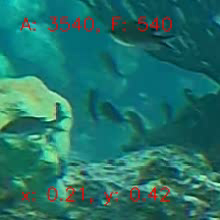

In [4]:
frame

In [5]:
label

array(['1', '0'], dtype='<U1')